In [1]:
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import pymc3 as pm

In [2]:
figsize(8, 5)
count_data = np.loadtxt("example_data/days_to_event.csv")
n_count_data = len(count_data)

Text(0.5, 0, 'Number of days since purchase')

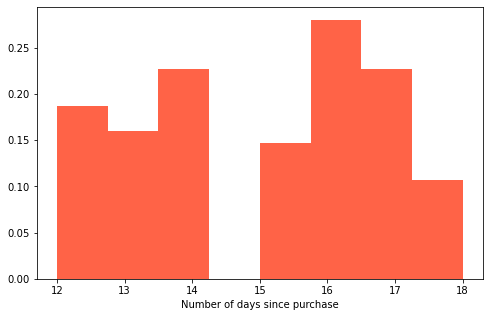

In [3]:
plt.hist(count_data, bins=8, density=True, color="#FF6347")
plt.xlabel("Number of days since purchase")

In [4]:
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Exponential("alpha", 1)
    beta = pm.Exponential("beta", 1)
    # Likelihood (sampling distribution) of observations
    observation = pm.Weibull("observation", alpha, beta, observed=count_data)

In [5]:
with basic_model:
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 18 seconds.


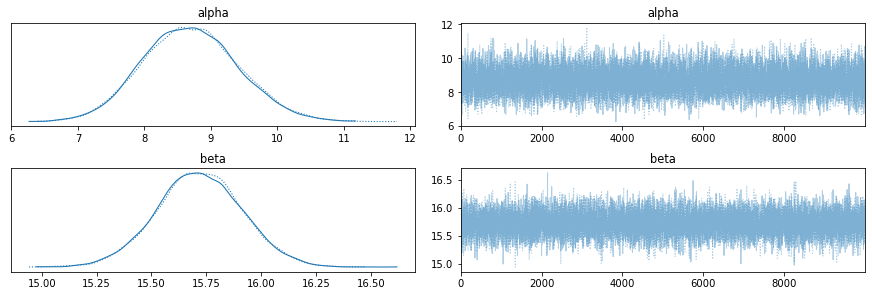

In [6]:
with basic_model:
    axes_arr = az.plot_trace(trace)
plt.draw()

In [7]:
with basic_model:
    print(az.summary(trace))

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
alpha   8.693  0.714   7.348   10.019      0.006    0.004   14683.0  14495.0   
beta   15.719  0.195  15.351   16.085      0.002    0.001   14650.0  14650.0   

       ess_bulk  ess_tail  r_hat  
alpha   14761.0   11927.0    1.0  
beta    14662.0   11694.0    1.0  


In [8]:
with basic_model:
    ppc = pm.sample_posterior_predictive(
        trace, var_names=["alpha", "beta", "observation"]
    )

In [9]:
ppc["observation"].shape

(20000, 100)

/home/tanmay/Software/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


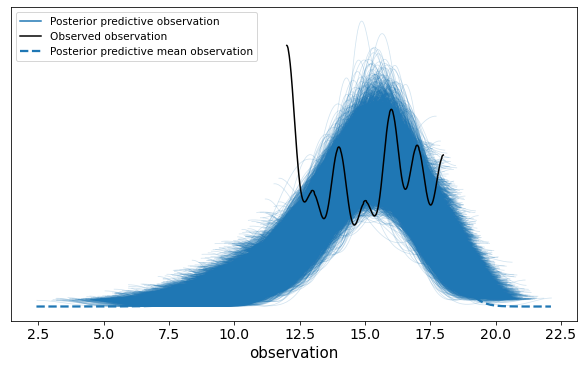

In [10]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=basic_model));